In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm import tqdm

In [ ]:

# Path to dataset 
dataset_path = "../Data/UTKFace"

def parse_utkface_filename(filename):
    """Extract age, gender and race from UTKFace filename"""
    parts = filename.split('_')
    if len(parts) >= 3:
        age = int(parts[0])
        gender = int(parts[1])  # 0: male, 1: female
        race = int(parts[2])    # 0: White, 1: Black, 2: Asian, 3: Indian, 4: Others
        return age, gender, race
    return None, None, None


In [5]:
data = []
for img_name in os.listdir(dataset_path):
    if img_name.endswith('.jpg'):
        age, gender, race = parse_utkface_filename(img_name)
        if age is not None:
            data.append({'age': age, 'gender': gender, 'race': race, 'filename': img_name})

In [6]:
df = pd.DataFrame(data)

In [22]:
if not os.path.exists("../Data/UTKFace/images.csv"):
    df.to_csv("../Data/images.csv" , index=False)

In [8]:
df.head()

,age,gender,race,filename
0,33,0,0,33_0_0_20170117145924419.jpg.chip.jpg
1,45,0,1,45_0_1_20170116022112213.jpg.chip.jpg
2,20,1,2,20_1_2_20170116194052786.jpg.chip.jpg
3,70,0,0,70_0_0_20170117173910928.jpg.chip.jpg
4,15,1,0,15_1_0_20170109204203014.jpg.chip.jpg


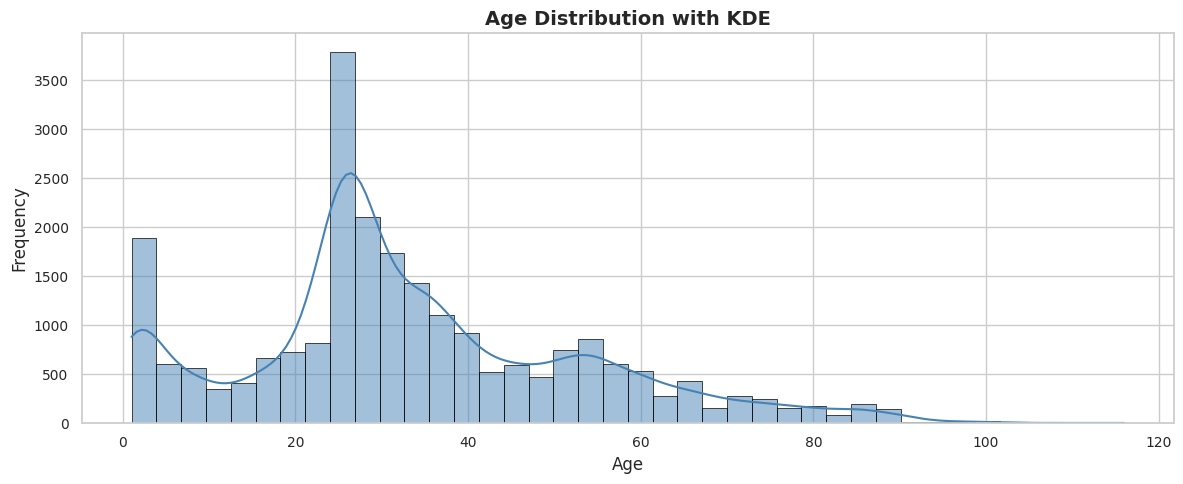

In [17]:
plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid")

sns.histplot(
    df['age'],
    bins=40,
    kde=True,
    color='steelblue',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Age Distribution with KDE', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


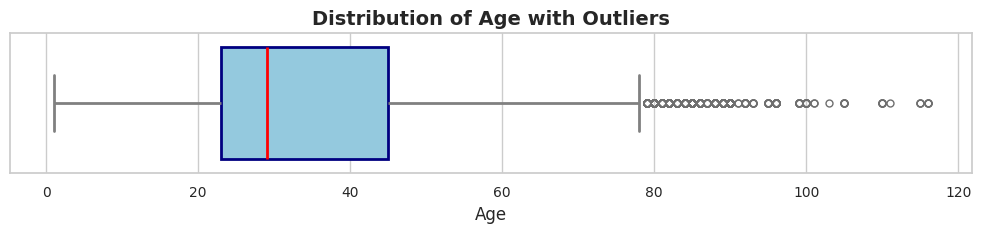

In [16]:
plt.figure(figsize=(10, 2.5))
sns.set_theme(style="whitegrid")

sns.boxplot(
    x=df['age'],
    color='skyblue',
    fliersize=5,       # size of outlier markers
    linewidth=2,       # border width of box
    boxprops=dict(edgecolor='navy'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

plt.title('Distribution of Age with Outliers', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([])  # remove y-axis ticks since it's a 1D boxplot

plt.tight_layout()
plt.show()


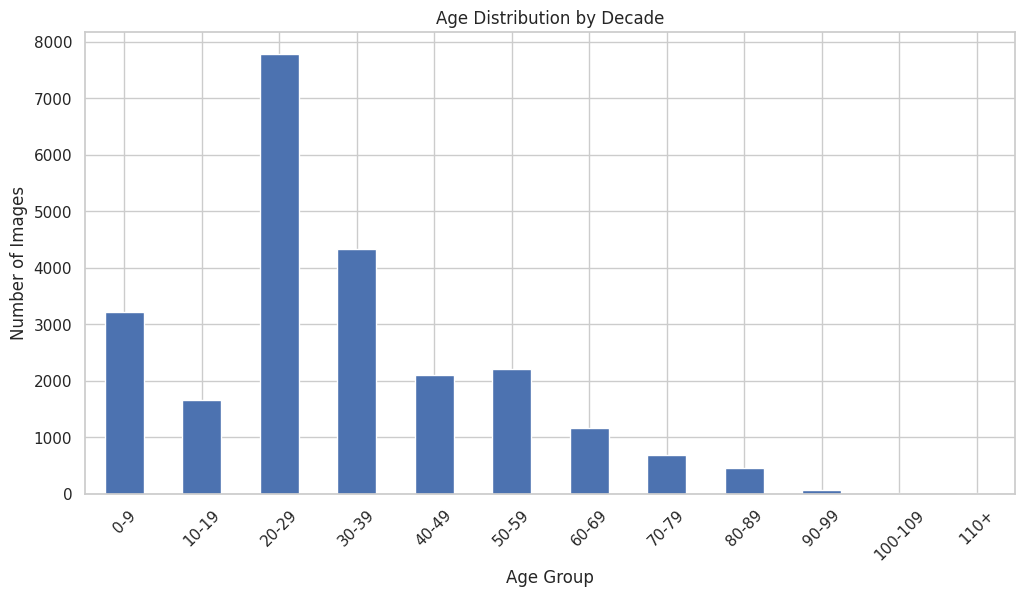

In [18]:
# Age distribution by decade
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
                         labels=['0-9', '10-19', '20-29', '30-39', '40-49', 
                                '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110+'])

age_group_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar')
plt.title('Age Distribution by Decade')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


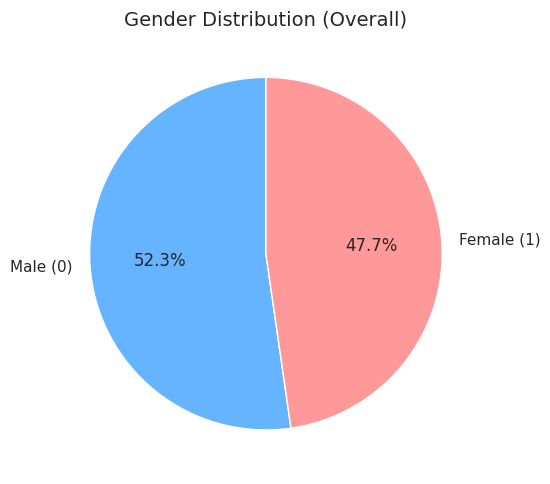

<Figure size 1000x600 with 0 Axes>

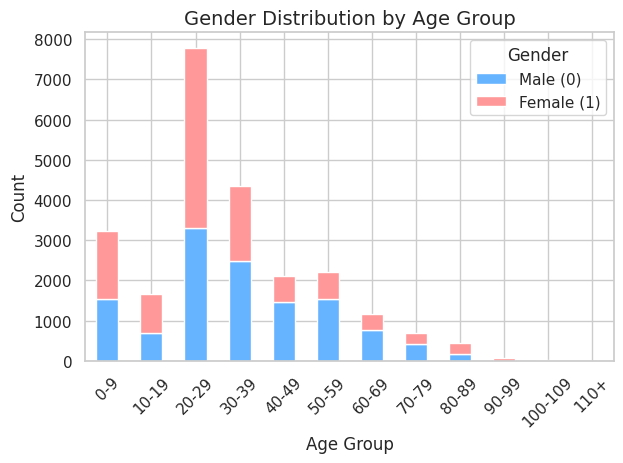


Gender Percentage by Age Group:
gender        0      1
age_group             
0-9        47.8   52.2
10-19      41.5   58.5
20-29      42.5   57.5
30-39      57.1   42.9
40-49      69.3   30.7
50-59      69.7   30.3
60-69      66.3   33.7
70-79      61.6   38.4
80-89      37.7   62.3
90-99      10.6   89.4
100-109    38.5   61.5
110+        0.0  100.0


In [ ]:

gender_counts = df['gender'].value_counts()
gender_labels = ['Male (0)', 'Female (1)']

plt.figure(figsize=(8, 5))
plt.pie(
    gender_counts,
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Gender Distribution (Overall)', fontsize=14)
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

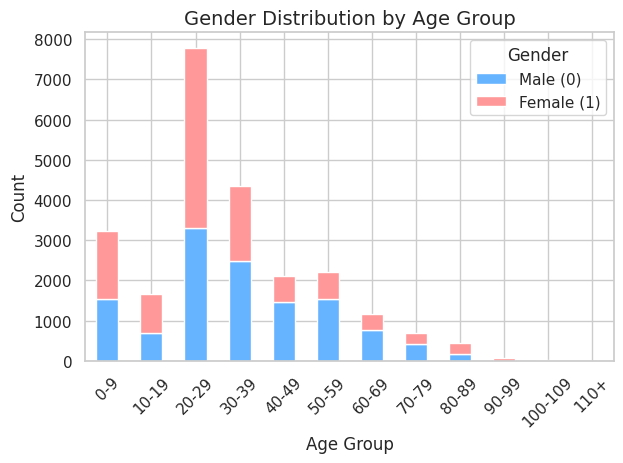

In [26]:

# Gender distribution by age group (stacked bar plot)
gender_age = pd.crosstab(df['age_group'], df['gender'])

# Plot in a new figure (not subplot)
plt.figure(figsize=(10, 6))
gender_age.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])

plt.title('Gender Distribution by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=gender_labels)
plt.tight_layout()
plt.show()


In [28]:

# Gender ratio by age group in percentage
gender_age_perc = gender_age.div(gender_age.sum(1), axis=0) * 100
print("\nGender Percentage by Age Group:")
print(gender_age_perc.round(1))


Gender Percentage by Age Group:
gender        0      1
age_group             
0-9        47.8   52.2
10-19      41.5   58.5
20-29      42.5   57.5
30-39      57.1   42.9
40-49      69.3   30.7
50-59      69.7   30.3
60-69      66.3   33.7
70-79      61.6   38.4
80-89      37.7   62.3
90-99      10.6   89.4
100-109    38.5   61.5
110+        0.0  100.0


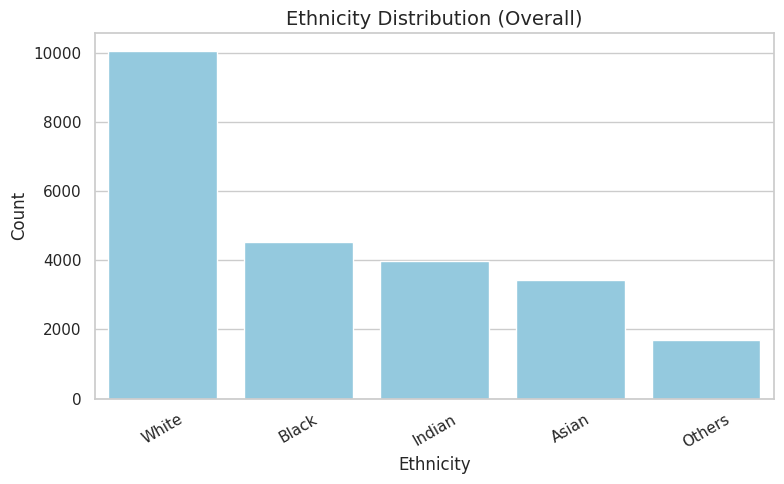

In [32]:
# Map ethnicity labels
ethnicity_map = {
    0: 'White', 
    1: 'Black', 
    2: 'Asian', 
    3: 'Indian', 
    4: 'Others'
}
df['ethnicity'] = df['race'].map(ethnicity_map)

# Ethnicity distribution bar chart
ethnicity_counts = df['ethnicity'].value_counts()

plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Use a single color or manually assign if needed
sns.barplot(
    x=ethnicity_counts.index,
    y=ethnicity_counts.values,
    color='skyblue'  # fixed color, avoids palette/hue warning
)

plt.title('Ethnicity Distribution (Overall)', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

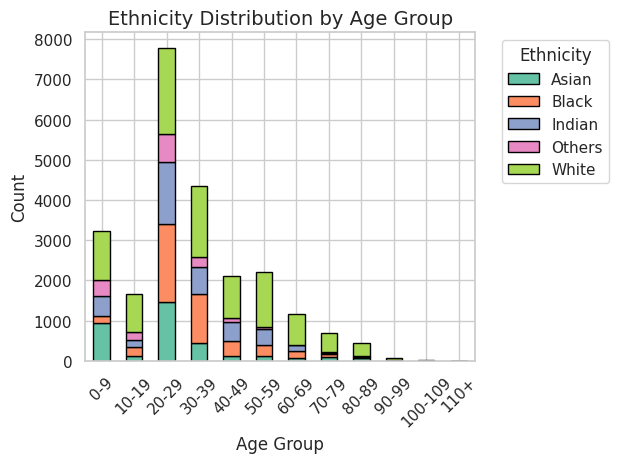


Ethnicity Representation by Age Group (Percentage):
ethnicity  Asian  Black  Indian  Others  White
age_group                                     
0-9         29.1    5.3    15.6    12.4   37.7
10-19        7.0   13.9    10.7    11.1   57.3
20-29       18.7   24.9    20.0     8.7   27.6
30-39       10.1   27.9    15.9     5.9   40.2
40-49        5.8   17.9    21.9     5.1   49.3
50-59        5.0   13.0    18.1     2.2   61.6
60-69        6.5   15.5    11.7     0.9   65.5
70-79       13.7   11.7     4.5     0.4   69.6
80-89       13.9    9.1     4.2     0.7   72.2
90-99       28.8    6.1     3.0     0.0   62.1
100-109     23.1   15.4     7.7     0.0   53.8
110+        12.5   12.5    12.5     0.0   62.5


In [33]:
# Ethnicity distribution by age group (stacked bar)
ethnicity_age = pd.crosstab(df['age_group'], df['ethnicity'])

plt.figure(figsize=(10, 6))
ethnicity_age.plot(
    kind='bar',
    stacked=True,
    color=sns.color_palette('Set2', n_colors=ethnicity_age.shape[1]),
    edgecolor='black'
)
plt.title('Ethnicity Distribution by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Ethnicity representation as percentage
ethnicity_age_perc = ethnicity_age.div(ethnicity_age.sum(1), axis=0) * 100
print("\nEthnicity Representation by Age Group (Percentage):")
print(ethnicity_age_perc.round(1))



In [34]:

# Under-representation check
min_rep = ethnicity_age_perc.min().min()
if min_rep < 5:
    print(f"\n⚠️ Warning: Some ethnic groups have very low representation (<5%) in certain age groups")


⚠️ Warning: Some ethnic groups have very low representation (<5%) in certain age groups


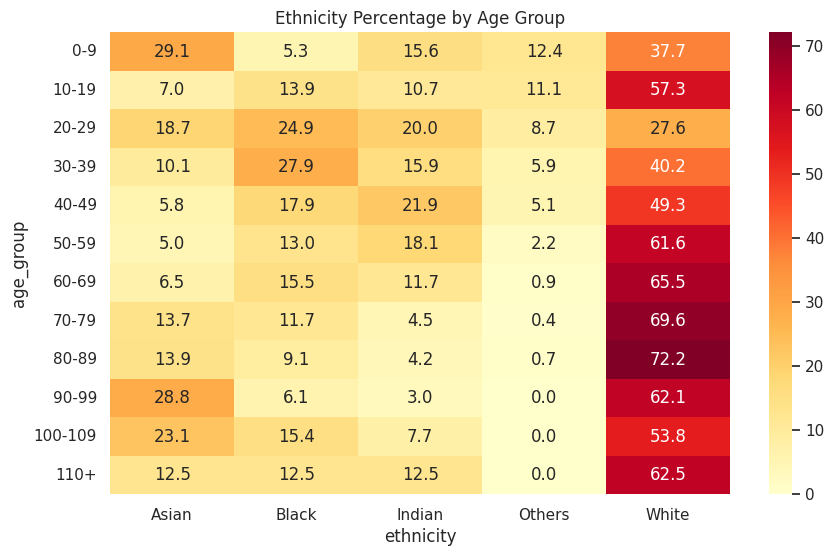

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(ethnicity_age_perc, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Ethnicity Percentage by Age Group')
plt.show()

100%|██████████| 500/500 [00:00<00:00, 12620.14it/s]


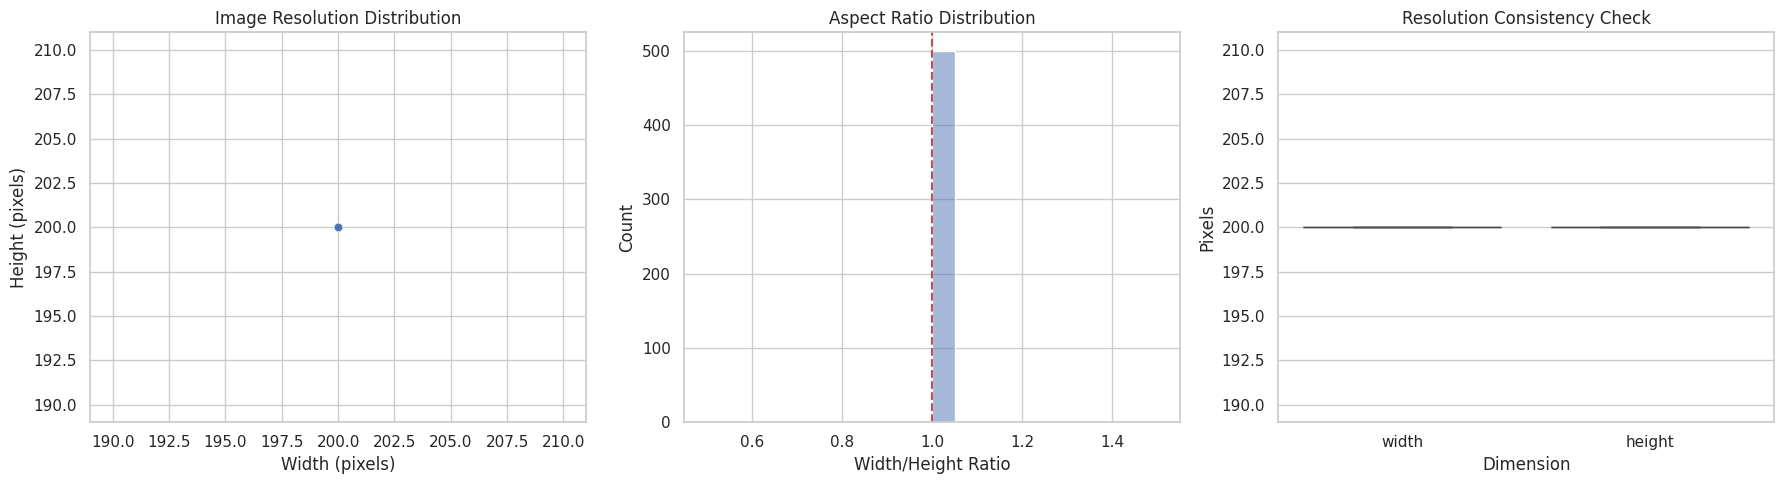


Image Quality Assessment Results:
- Unique resolutions: 1 different sizes
- Most common resolution: [200 200] (W x H)
- Aspect ratio range: 1.00 to 1.00
- Corrupted files detected: 0


/tmp/ipykernel_12002/3486589526.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"- Aspect ratio range: {ar_df.min()[0]:.2f} to {ar_df.max()[0]:.2f}")


In [43]:


# Initialize lists to store image metrics
resolutions = []
aspect_ratios = []
corrupted_files = []

# Sample 500 images for analysis (for faster processing)
sample_df = df.sample(min(500, len(df)), random_state=42)

for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    img_path = os.path.join(dataset_path, row['filename'])
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            resolutions.append((width, height))
            aspect_ratios.append(width / height)
    except:
        corrupted_files.append(row['filename'])

# Convert to DataFrames
res_df = pd.DataFrame(resolutions, columns=['width', 'height'])
ar_df = pd.DataFrame(aspect_ratios, columns=['aspect_ratio'])

# Visualization
plt.figure(figsize=(18, 5))

# Resolution distribution
plt.subplot(1, 3, 1)
sns.scatterplot(x='width', y='height', data=res_df, alpha=0.5)
plt.title('Image Resolution Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# Aspect ratio distribution
plt.subplot(1, 3, 2)
sns.histplot(ar_df['aspect_ratio'], bins=20, kde=True)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Width/Height Ratio')
plt.axvline(1.0, color='r', linestyle='--')  # Perfect square

# Resolution consistency
plt.subplot(1, 3, 3)
sns.boxplot(data=res_df.melt(), x='variable', y='value')
plt.title('Resolution Consistency Check')
plt.xlabel('Dimension')
plt.ylabel('Pixels')

plt.tight_layout()
plt.show()

# Print findings
print(f"\nImage Quality Assessment Results:")
print(f"- Unique resolutions: {res_df.drop_duplicates().shape[0]} different sizes")
print(f"- Most common resolution: {res_df.mode().iloc[0].values} (W x H)")
print(f"- Aspect ratio range: {ar_df.min()[0]:.2f} to {ar_df.max()[0]:.2f}")
print(f"- Corrupted files detected: {len(corrupted_files)}")

if len(corrupted_files) > 0:
    print("\nCorrupted files sample:", corrupted_files[:3])

In [49]:
# Initialize face analysis metrics
face_conditions = {
    'glasses': 0,
    'hats': 0,
    'frontal_face': 0,
    'good_lighting': 0
}

# Load pre-trained classifiers for accessory detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Analyze sample images
for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    img_path = os.path.join(dataset_path, row['filename'])
    try:
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Face detection
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        if len(faces) > 0:
            face_conditions['frontal_face'] += 1
            
            # Lighting assessment (histogram analysis)
            hist = cv2.calcHist([gray],[0],None,[256],[0,256])
            if cv2.mean(gray)[0] > 100 and cv2.mean(gray)[0] < 200:
                face_conditions['good_lighting'] += 1
                
            # Eye/glasses detection
            eyes = eye_cascade.detectMultiScale(gray)
            if len(eyes) == 0:  # Potential glasses
                face_conditions['glasses'] += 1
                
            # Simple hat detection (upper face region)
            (x,y,w,h) = faces[0]
            roi_gray = gray[y:y+int(h/3), x:x+w]
            if cv2.mean(roi_gray)[0] < 50:
                face_conditions['hats'] += 1
                
    except:
        continue

# Convert to percentages
total_samples = len(sample_df)
face_percentages = {k: (v/total_samples)*100 for k,v in face_conditions.items()}

100%|██████████| 500/500 [00:06<00:00, 80.66it/s]


/tmp/ipykernel_12002/2451834302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


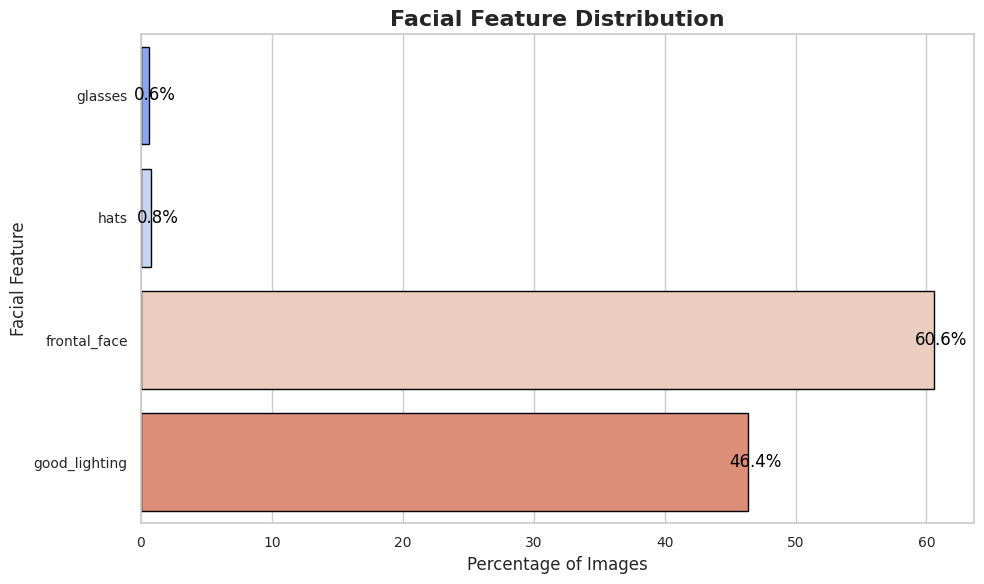

In [ ]:

plt.figure(figsize=(10, 6))


sns.barplot(
    x=list(face_percentages.values()), 
    y=list(face_percentages.keys()), 
    palette='coolwarm', 
    edgecolor='black'
)


plt.title('Facial Feature Distribution', fontsize=16, weight='bold')
plt.xlabel('Percentage of Images', fontsize=12)
plt.ylabel('Facial Feature', fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for i, perc in enumerate(face_percentages.values()):
    plt.text(
        perc + 0.5,  
        i,  
        f'{perc:.1f}%', 
        color='black',
        ha='center', 
        va='center'
    )

plt.tight_layout()
plt.show()


In [56]:
sns.set_context("notebook", font_scale=1.2)
palette = sns.color_palette("husl", 10)

# Create age decade bins
df['age_decade'] = (df['age'] // 10) * 10
df['age_decade'] = df['age_decade'].astype(str) + 's'

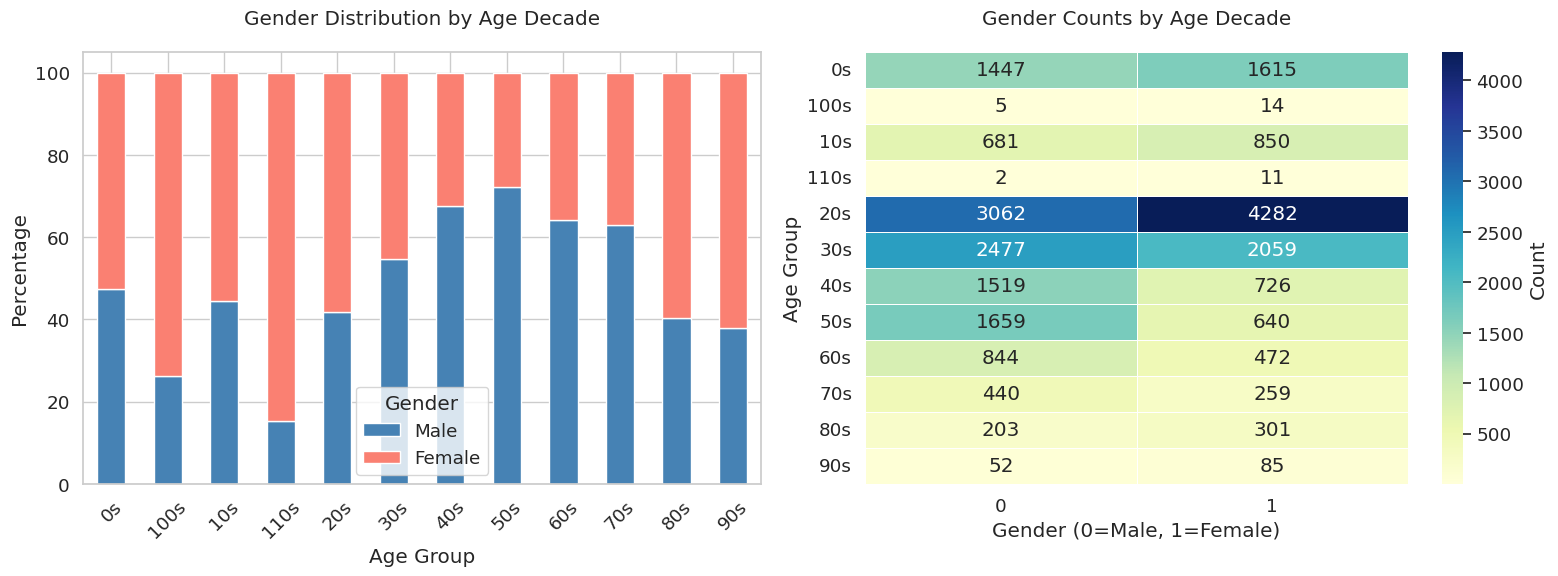

In [58]:
### 6. Age-Gender Interactions ###
plt.figure(figsize=(16, 6))

# Panel 1: Gender ratio by age
plt.subplot(1, 2, 1)
gender_by_age = df.groupby(['age_decade', 'gender']).size().unstack()
gender_by_age_perc = gender_by_age.div(gender_by_age.sum(1), axis=0) * 100
gender_by_age_perc.plot(kind='bar', stacked=True, color=['steelblue', 'salmon'], ax=plt.gca())
plt.title('Gender Distribution by Age Decade', pad=20)
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(['Male', 'Female'], title='Gender')
plt.xticks(rotation=45)

# Panel 2: Heatmap of gender-age distribution
plt.subplot(1, 2, 2)
cross_tab = pd.crosstab(df['age_decade'], df['gender'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', 
            linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Gender Counts by Age Decade', pad=20)
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Age Group')

plt.tight_layout()
plt.show()

/tmp/ipykernel_12002/1508467913.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ethnicity', y='age', data=df, palette='Set2', ax=ax1)


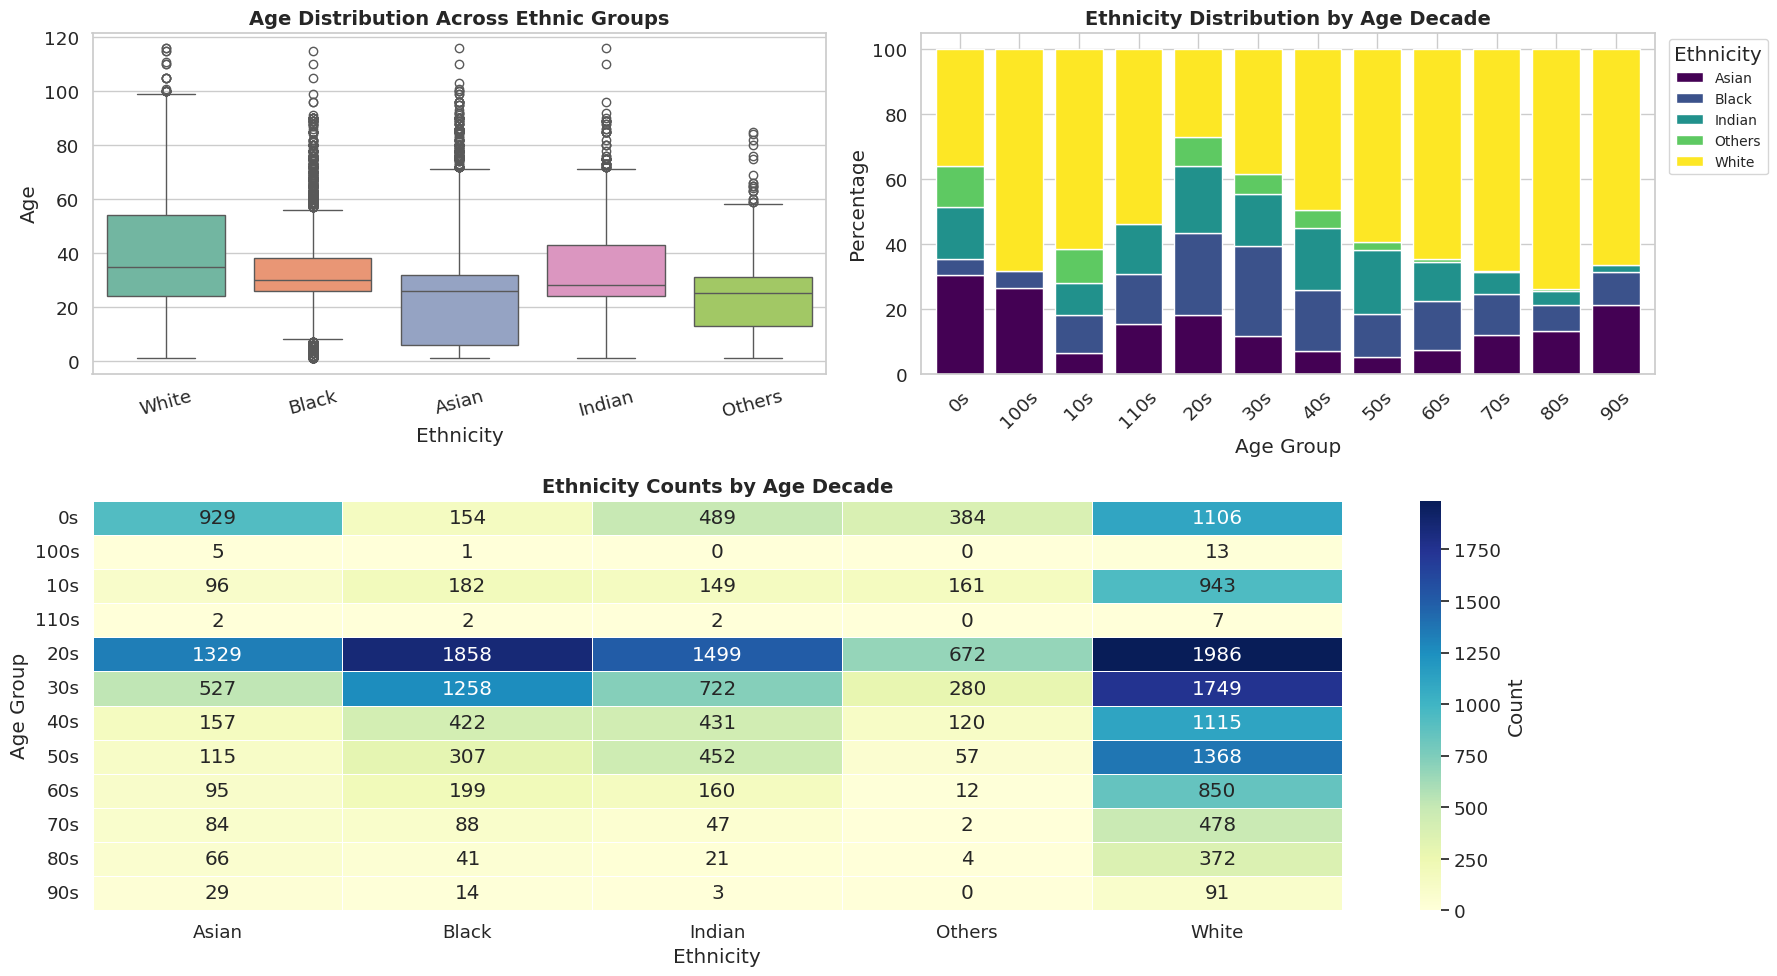

In [64]:
### 7. Age–Ethnicity Interactions ###
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

# Panel 1: Age distribution by ethnicity (boxplot)
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='ethnicity', y='age', data=df, palette='Set2', ax=ax1)
ax1.set_title('Age Distribution Across Ethnic Groups', fontsize=14, weight='bold')
ax1.set_xlabel('Ethnicity')
ax1.set_ylabel('Age')
ax1.tick_params(axis='x', rotation=15)

# Panel 2: Ethnicity distribution by age decades (stacked bar chart)
ax2 = fig.add_subplot(gs[0, 1])
ethnicity_age = df.groupby(['age_decade', 'ethnicity']).size().unstack()
ethnicity_percent = ethnicity_age.div(ethnicity_age.sum(1), axis=0) * 100
ethnicity_percent.plot(kind='bar', stacked=True, cmap='viridis', width=0.8, ax=ax2)
ax2.set_title('Ethnicity Distribution by Age Decade', fontsize=14, weight='bold')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Percentage')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Ethnicity', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=10)

# Panel 3: Heatmap (spans full row)
ax3 = fig.add_subplot(gs[1, :])
cross_tab = pd.crosstab(df['age_decade'], df['ethnicity'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu',
            linewidths=0.5, cbar_kws={'label': 'Count'}, ax=ax3)
ax3.set_title('Ethnicity Counts by Age Decade', fontsize=14, weight='bold')
ax3.set_xlabel('Ethnicity')
ax3.set_ylabel('Age Group')

plt.tight_layout()
plt.show()


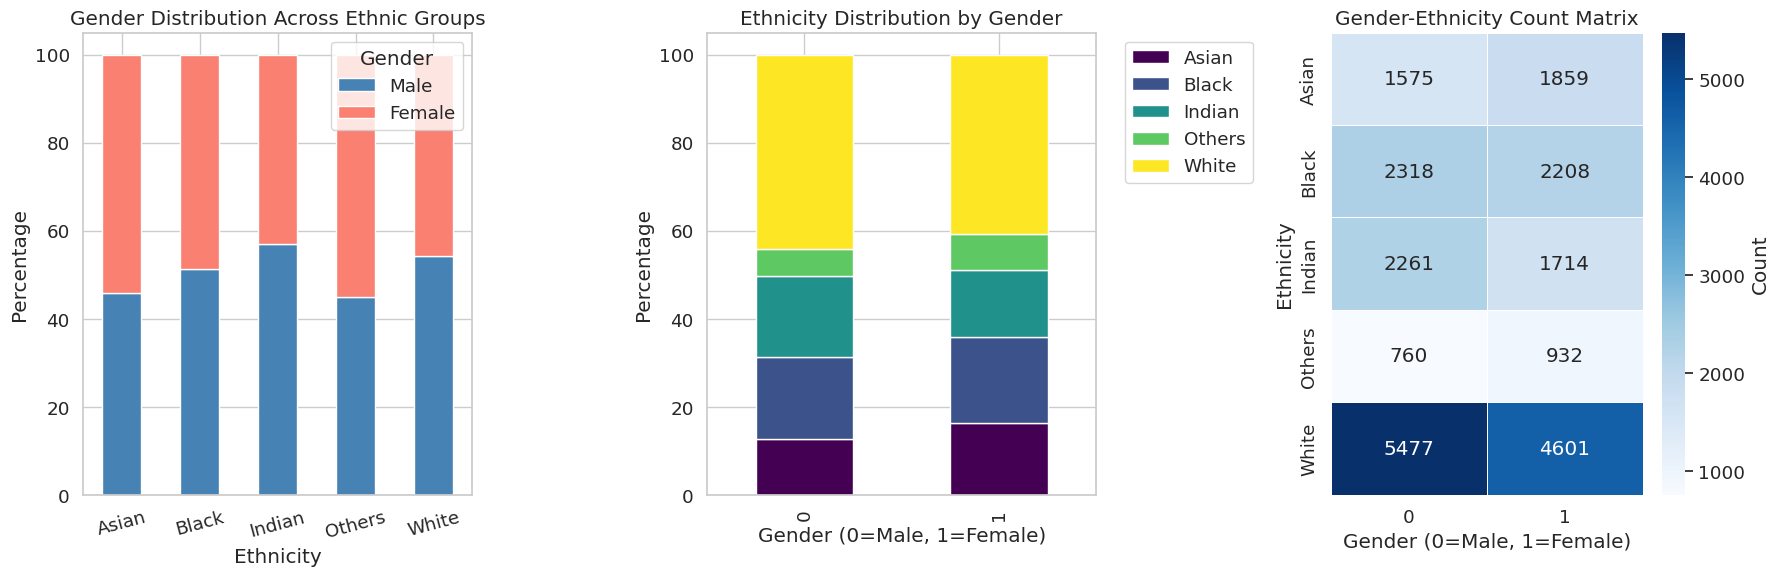

In [60]:
### 8. Gender-Ethnicity Interactions ###
plt.figure(figsize=(18, 6))

# Panel 1: Gender distribution across ethnicities
plt.subplot(1, 3, 1)
gender_eth = df.groupby(['ethnicity', 'gender']).size().unstack()
(gender_eth.div(gender_eth.sum(1), axis=0)*100).plot(
    kind='bar', stacked=True, color=['steelblue', 'salmon'], ax=plt.gca())
plt.title('Gender Distribution Across Ethnic Groups')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.legend(['Male', 'Female'], title='Gender')
plt.xticks(rotation=15)

# Panel 2: Ethnicity distribution by gender
plt.subplot(1, 3, 2)
eth_gender = df.groupby(['gender', 'ethnicity']).size().unstack()
(eth_gender.div(eth_gender.sum(1), axis=0)*100).plot(
    kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.title('Ethnicity Distribution by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Panel 3: Interaction heatmap
plt.subplot(1, 3, 3)
cross_tab = pd.crosstab(df['ethnicity'], df['gender'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', 
            linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Gender-Ethnicity Count Matrix')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Ethnicity')

plt.tight_layout()
plt.show()

In [ ]:
# my_ml_project/
# │
# ├── data/                   # All data-related files
# │   ├── raw/                # Original, immutable raw data
# │   ├── processed/          # Processed/cleaned data
# │   ├── external/           # Third-party data sources
# │   ├── interim/            # Intermediate data files
# │   └── README.md           # Data documentation
# │
# ├── notebooks/              # Jupyter notebooks for exploration
# │   ├── 01-eda.ipynb
# │   ├── 02-preprocessing.ipynb
# │   └── 03-modeling.ipynb
# │
# ├── src/                    # Source code
# │   ├── data/               # Data processing scripts
# │   │   ├── make_dataset.py
# │   │   └── preprocess.py
# │   │
# │   ├── features/           # Feature engineering
# │   │   ├── build_features.py
# │   │   └── augmentations.py
# │   │
# │   ├── models/             # Model-related code
# │   │   ├── train.py
# │   │   ├── predict.py
# │   │   └── model.py
# │   │
# │   ├── visualization/      # Visualization scripts
# │   │   └── visualize.py
# │   │
# │   └── utils/              # Utility functions
# │       └── helpers.py
# │
# ├── models/                 # Trained/serialized models
# │   ├── model.pkl
# │   └── model_checkpoints/  # Training checkpoints
# │
# ├── reports/                # Generated analysis/reports
# │   ├── figures/            # Figures/plots
# │   └── results.csv
# │
# ├── tests/                  # Unit tests
# │   ├── test_data.py
# │   └── test_models.py
# │
# ├── .gitignore             # Specifies files to ignore for git
# ├── requirements.txt       # Python dependencies
# ├── setup.py               # For installing as package
# ├── config.yml             # Configuration file
# └── README.md              # Project overview/documentation